## DATA 620 - Final Project

### Authors: Brian Weinfield, Alex Low, Jagruti Solao, Niteen Kumar

### Date: 07/19/2018

### Overview

In this project, we explored emotions surrounding England's World Cup run by conducting sentiment analysis on Twitter. We were interested in exploring how sentiment changed over time especially before and after big matches depending on whether the team won or lost.  We were also interested in whether sentiment varied based on the hash tag that people used in their tweets.

Since we were new to conducting this type of analysis, we tested two different tools: Vader and TextBlob.  Vader has a "compound" score which we thought would be a good summary assessment of the positive or negative polarity of each tweet. TextBlob does likewise, accompanied by a "subjectivity" score, though we did not think that was particularly important for this project. 

Finally we were interested in exploring the prevalence of words within those tweets using a word cloud to see which words and phrases were most prominent.

In [273]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from datetime import datetime
from dateutil.parser import parse
import textblob
from textblob import TextBlob

#### Part 1: Preparing Data Frame with Sentiment Analysis Scores for Each Tweet

In [227]:
sid = SentimentIntensityAnalyzer()

In [230]:
# Importing Tweet Text
wc_df = pd.read_csv("https://raw.githubusercontent.com/solaojp/DATA-620/master/Fifareload.csv", header=None)

In [231]:
# Removing Duplicates
wc_df = wc_df.drop_duplicates()

In [232]:
wc_df.head()

,0,1,2
0,7/13/18 18:42,b'Any word on who won the Sham Fight this year...,NaN
1,7/13/18 18:42,"b""I'M REALLY SORRY! I WANTED TO KEEP THE TOGET...",NaN
2,7/13/18 18:39,b'RT @16AirAssltBde: #ItsComingHome \nStill to...,NaN
3,7/13/18 18:39,b'RT @kkdhaliwal_: Sikh family wedding. I bloo...,NaN
4,7/13/18 18:39,b'@GaryLineker @sidlowe Can\xe2\x80\x99t wait ...,NaN


In [233]:
wc_df = wc_df.drop([2], axis=1)

In [235]:
wc_df.columns = ['datetime','tweet']

In [236]:
# Assessing Sentiment Polarity for Each Tweet Using Vader
wc_df['sentiment'] = [sid.polarity_scores(tweet)["compound"] for tweet in wc_df['tweet']]

In [237]:
wc_df.head()

,datetime,tweet,sentiment
0,7/13/18 18:42,b'Any word on who won the Sham Fight this year...,0.2732
1,7/13/18 18:42,"b""I'M REALLY SORRY! I WANTED TO KEEP THE TOGET...",-0.3229
2,7/13/18 18:39,b'RT @16AirAssltBde: #ItsComingHome \nStill to...,0.0000
3,7/13/18 18:39,b'RT @kkdhaliwal_: Sikh family wedding. I bloo...,0.3182
4,7/13/18 18:39,b'@GaryLineker @sidlowe Can\xe2\x80\x99t wait ...,0.0000


In [238]:
wc_df['datetime']=pd.to_datetime(wc_df['datetime'])

In [239]:
wc_df['date']=[datetime.date(y) for y in wc_df['datetime']]

In [240]:
# Identifying Tweet Volume by Date
tweet_volume = pd.value_counts(wc_df['date'].values)

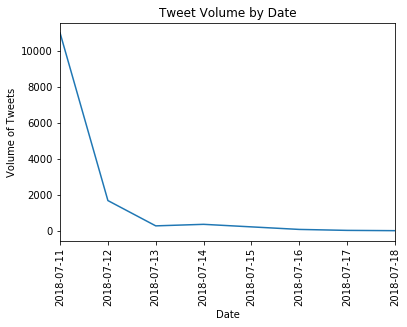

In [272]:
tweet_volume.plot()
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Volume of Tweets')
plt.title("Tweet Volume by Date")
plt.show()

#### Part 2: Summarizing Mean and Median Sentiment Over Time by Sentiment Analysis Tool

In [243]:
# Calculating Mean Polarity by Date
wc_summary = wc_df['sentiment'].groupby(wc_df['date']).mean()

In [245]:
wc_summary = pd.DataFrame(wc_summary)

In [274]:
wc_summary

,sentiment,date
date,,
2018-07-11,0.270825,2018-07-11
2018-07-12,0.356083,2018-07-12
2018-07-13,0.295836,2018-07-13
2018-07-14,0.464895,2018-07-14
2018-07-15,0.300899,2018-07-15
2018-07-16,0.405941,2018-07-16
2018-07-17,0.291378,2018-07-17
2018-07-18,0.280472,2018-07-18


In [246]:
wc_summary['date'] = wc_summary.index

In [247]:
# Calculating Median Polarity by Date
wc_summary2 = wc_df['sentiment'].groupby(wc_df['date']).median()

In [249]:
wc_summary2 = pd.DataFrame(wc_summary2)

In [250]:
wc_summary2['date'] = wc_summary2.index

In [256]:
# Assessing Sentiment Polarity for Each Tweet Using TextBlob
wc_df['sentiment2'] = [TextBlob(tweet).sentiment[0] for tweet in wc_df['tweet']]

In [257]:
wc_df.head()

,datetime,tweet,sentiment,date,sentiment2
0,2018-07-13 18:42:00,b'Any word on who won the Sham Fight this year...,0.2732,2018-07-13,-0.2000
1,2018-07-13 18:42:00,"b""I'M REALLY SORRY! I WANTED TO KEEP THE TOGET...",-0.3229,2018-07-13,-0.7125
2,2018-07-13 18:39:00,b'RT @16AirAssltBde: #ItsComingHome \nStill to...,0.0000,2018-07-13,0.0000
3,2018-07-13 18:39:00,b'RT @kkdhaliwal_: Sikh family wedding. I bloo...,0.3182,2018-07-13,-0.1500
4,2018-07-13 18:39:00,b'@GaryLineker @sidlowe Can\xe2\x80\x99t wait ...,0.0000,2018-07-13,0.0000


In [258]:
# Calculating Mean Polarity by Date
wc_summary_tb = wc_df['sentiment2'].groupby(wc_df['date']).mean()

In [259]:
wc_summary_tb = pd.DataFrame(wc_summary_tb)

In [260]:
wc_summary_tb['date'] = wc_summary_tb.index

In [261]:
wc_summary_tb

,sentiment2,date
date,,
2018-07-11,0.165400,2018-07-11
2018-07-12,0.226797,2018-07-12
2018-07-13,0.240344,2018-07-13
2018-07-14,0.461612,2018-07-14
2018-07-15,0.169344,2018-07-15
2018-07-16,0.182509,2018-07-16
2018-07-17,0.226709,2018-07-17
2018-07-18,0.214042,2018-07-18


In [262]:
# Calculating Median Polarity by Date
wc_summary_tb2 = wc_df['sentiment2'].groupby(wc_df['date']).median()

In [263]:
wc_summary_tb2 = pd.DataFrame(wc_summary_tb2)

In [264]:
wc_summary_tb2['date'] = wc_summary_tb2.index

In [265]:
wc_summary_tb2

,sentiment2,date
date,,
2018-07-11,0.000,2018-07-11
2018-07-12,0.125,2018-07-12
2018-07-13,0.000,2018-07-13
2018-07-14,0.500,2018-07-14
2018-07-15,0.000,2018-07-15
2018-07-16,0.025,2018-07-16
2018-07-17,0.000,2018-07-17
2018-07-18,0.000,2018-07-18


In [266]:
wc_summary3 = pd.merge(wc_summary, wc_summary_tb, on='date')

In [267]:
wc_summary4 = pd.merge(wc_summary2, wc_summary_tb2, on='date')

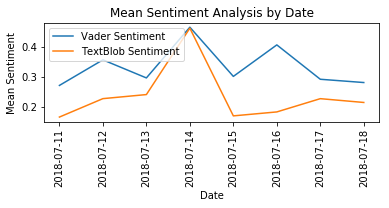

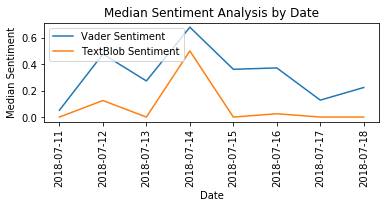

In [271]:
plt.subplot(2, 1, 1)
plt.plot(wc_summary3['date'],wc_summary3['sentiment'])
plt.plot(wc_summary3['date'],wc_summary3['sentiment2'])
plt.xticks(rotation=90)
plt.legend(['Vader Sentiment', 'TextBlob Sentiment'], loc='upper left')
plt.xlabel('Date')
plt.ylabel('Mean Sentiment')
plt.title("Mean Sentiment Analysis by Date")
plt.show()

plt.subplot(2, 1, 2)
plt.plot(wc_summary4['date'],wc_summary4['sentiment'])
plt.plot(wc_summary4['date'],wc_summary4['sentiment2'])
plt.xticks(rotation=90)
plt.legend(['Vader Sentiment', 'TextBlob Sentiment'], loc='upper left')
plt.xlabel('Date')
plt.ylabel('Median Sentiment')
plt.title("Median Sentiment Analysis by Date")
plt.show()

#### Part 3: Summarizing Mean Sentiment Over Time by Hashtag

In [282]:
wc_df_lions = wc_df[wc_df['tweet'].str.contains("#threelions")]

In [281]:
wc_df_cominghome = wc_df[wc_df['tweet'].str.contains("#itscominghome" or "#cominghome")]

In [287]:
wc_df_england = wc_df[wc_df['tweet'].str.contains("@england")]

In [294]:
wc_summary_lion = pd.DataFrame(wc_df_lions['sentiment'].groupby(wc_df['date']).mean())

In [295]:
wc_summary_cominghome = pd.DataFrame(wc_df_cominghome['sentiment'].groupby(wc_df['date']).mean())

In [296]:
wc_summary_england = pd.DataFrame(wc_df_england['sentiment'].groupby(wc_df['date']).mean())

In [303]:
wc_summary_cominghome.head()

,sentiment,date
date,,
2018-07-11,0.213428,2018-07-11
2018-07-12,0.475781,2018-07-12
2018-07-13,0.330345,2018-07-13
2018-07-14,0.269110,2018-07-14
2018-07-15,0.122920,2018-07-15


In [297]:
wc_summary_lion['date'] = wc_summary_lion.index
wc_summary_cominghome['date'] = wc_summary_cominghome.index
wc_summary_england['date'] = wc_summary_england.index

In [ ]:
wc_summary_lion['sentiment'] = wc_summary_lion.index
wc_summary_cominghome['date'] = wc_summary_cominghome.index
wc_summary_england['date'] = wc_summary_england.index

In [304]:
wc_summary_hash = pd.merge(wc_summary_lion, wc_summary_cominghome, on='date')
wc_summary_hash = pd.merge(wc_summary_hash, wc_summary_england, on='date')
wc_summary_hash.columns = ['3Lions Sentiment','Date','ComingHome Sentiment','England Sentiment']

In [305]:
wc_summary_hash.head()

,3Lions Sentiment,Date,ComingHome Sentiment,England Sentiment
0,0.178753,2018-07-11,0.213428,0.320006
1,0.121560,2018-07-12,0.475781,0.376152
2,0.068242,2018-07-13,0.330345,0.727188
3,0.350125,2018-07-14,0.269110,0.729700
4,0.047733,2018-07-15,0.122920,0.486467


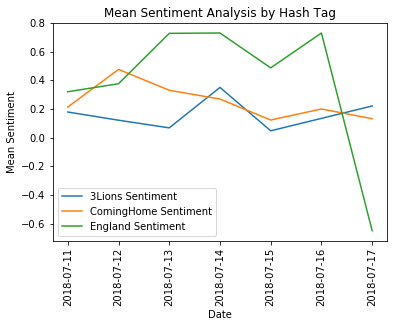

In [308]:
plt.plot(wc_summary_hash['Date'],wc_summary_hash['3Lions Sentiment'])
plt.plot(wc_summary_hash['Date'],wc_summary_hash['ComingHome Sentiment'])
plt.plot(wc_summary_hash['Date'],wc_summary_hash['England Sentiment'])
plt.xticks(rotation=90)
plt.legend(loc='lower left')
plt.xlabel('Date')
plt.ylabel('Mean Sentiment')
plt.title("Mean Sentiment Analysis by Hash Tag")
plt.show()

#### Part 4: Creating a Word Cloud

#### Conclusion

Unsurprisingly, the volume of tweets and polarity of sentiment changed over time. It was especially interesting to see the dip in sentiment around England semi-final loss to Croatia (July 11) but the revival in sentiment in the lead-up to the 3rd place match against Belgium (though as you can tell from the volume of tweets, there was a lot less interest in that match than the more meaningful semi final match.)

In general polarity was positive about England's World Cup run, a rare feat for England's fans who have often been quick to turn on their national team. This reflects the general national backing for this team which over-performed and showed admirable traits of strong team bonds and positive play.

Unfortunately, due to Twitter constraints we could only pull a week of data which hampered our ability to see how sentiment analysis changed during early stages of the tournament - especially in the lead-up and aftermath of England's 2nd round and quarter final matches against Panama and Sweden respectively, and the lead-up to the semi final match against Croatia.